## PARTIAL DERIVATIVES:
The **partial derivative** measures the impact of a single input(variable) has on a function's
output.
## Gradients:
It is a vector of all the possible partial derivatives of a function.
We use  derivatives of single variable fucntions and the gradients of multivariate functions
to perform gradient descent.
## Chain Rule:
The derivatives of chained functions is the product of the partial derivatives of the
subsequent  functions.

# **BACKPROPAGATION**:
We use the chain rule to measure the impact of variables on function's output.

**THE BIGGEST PROBLEM IN NEURAL NETWORKS IS TO MINIMIZE THE LOSS OF THE NETWORK**

We'll start with the relu :
ReLU($\sum$(inputs*weights)+bias))

ReLU(x0w0+x1w1+x2w2+b)

y = ReLU(**sum**(**mul**(x0,w0),**mul**(x1,w1),**mul**(x2,w2),b))
loss  = -log(smax(relu(sum(mul,b)))

During the backward pass, we actually calculate the derivative of the loss function, 
and use it to multiply with the derivative of the activation function of the output layer
then we use this result to multiply with the derivative of the output layer then we use this
result to multiply with each of the derivative of the activation function of the previous layer and so on through all the hidden layers. 
Inside each layer the derivative with respect to the weights and biases form the gradients
that we'll utilize to update the weights and biases.

**The derivatives w.r.t to the inputs will form the gradients to chain with the previous layer.**



In [1]:
#inputs:
x = [1.0 , -2.0 , 3.0]
#weights:
w = [2.0 , -1.0 , 3.0]
#bias:
b = 1.0

In [2]:
#forward pass:
#weighted sum:
z = x[0]*w[0] + x[1]*w[1] + x[2]*w[2] + b
print(z)
#RelU activation function:
y = max(z,0)
print(y)

14.0
14.0


In [3]:
#BACKWARD PASS:
#The derivative from the next layer
d_next = 1.0 #say
#Derivative of relu + the chain rule:
drelu = d_next * (1. if z > 0 else 0)
print(drelu)

dsum_dxw0 = 1
drelu_dwx0 = drelu * dsum_dxw0

dsum_dxw1 = 1
drelu_dwx1 = drelu * dsum_dxw1

dsum_dxw2 = 1
drelu_dwx2 = drelu * dsum_dxw2

dsum_dbias = 1
drelu_bias = drelu * dsum_dbias 

#
dmul_dx0 = w[0]
drelu_dx0 = drelu_dwx0 * dmul_dx0

dmul_dx1 = w[1]
drelu_dx1 = drelu_dwx1 * dmul_dx1

dmul_dx2 = w[2]
drelu_dx2 = drelu_dwx2 * dmul_dx2

dmul_dw0 = x[0]
drelu_dw0 = drelu_dwx0 * dmul_dw0

dmul_dw1 = x[1]
drelu_dw1 = drelu_dwx1 * dmul_dw1

dmul_dw2 = x[2]
drelu_dw2 = drelu_dwx2 * dmul_dw2



1.0


In [4]:
dx = [drelu_dx0 , drelu_dx1 , drelu_dx2] #gradient on inputs
dw = [drelu_dw0 , drelu_dw1 , drelu_dw2] #gradient on weights
db = drelu_bias #gradient on biases

print("Gradient on inputs", dx)
print("Gradient on weights",dw)
print("Gradient on  bias",db)

Gradient on inputs [2.0, -1.0, 3.0]
Gradient on weights [1.0, -2.0, 3.0]
Gradient on  bias 1.0


In [5]:
#Applying a fraction of the gradients to the weights:
w[0] += -0.001 * dw[0]
w[1] += -0.001 * dw[1]
w[2] += -0.001 * dw[2]
b += -0.001 * db
#we have updated the values of our weights and biases:
print(w,b)

[1.999, -0.998, 2.997] 0.999


In [6]:
z_updated = x[0]*w[0] + x[1]*w[1] + x[2]*w[2] + b
print(z_updated)
#RelU activation function:
y_updated = max(z_updated,0)
print(y_updated)

13.985000000000001
13.985000000000001


#### NOTE:
We have lowered the value of the relu activation of this neuron.
But it doesn't make much sense to do so our main objective is to lower the **LOSS FUNCTION**
over the whole network.

Doing the same for a layer of neuron:


In [7]:
import numpy as np

dvalues = np.array([[1.0,1.0,1.0]])
weights = np.array([[0.2, 0.8 , -0.9, -0.3],
                    [0.3, 0.1 ,-0.97, 0.26],
                    [-0.76 , 0.43 , -0.22 , 0.17]]).T
print(dvalues.shape)
print(weights.shape)
dx0_new = sum(weights[0]*dvalues[0])
dx1_new = sum(weights[1]*dvalues[0])
dx2_new = sum(weights[2]*dvalues[0])
dx3_new = sum(weights[3]*dvalues[0])

dinputs = np.array([dx0_new , dx1_new , dx2_new , dx3_new])
print(dinputs)

(1, 3)
(4, 3)
[-0.26  1.33 -2.09  0.13]


In [8]:
dinputs_usingdot = np.dot(dvalues[0],weights.T)
print(dinputs_usingdot)

[-0.26  1.33 -2.09  0.13]


In [9]:
dvalues_forabatch = np.array([[1.0 , 1.0 ,1.0],
                              [2.0, 2.0, 2.0],
                              [3.0 , 3.0 ,3.0]])

weights_batch  = np.array([[0.2, 0.8 , -0.9, -0.3],
                            [0.3, 0.1 ,-0.97, 0.26],
                            [-0.76 , 0.43 , -0.22 , 0.17]]).T

input_batch = np.array([[1,2,3,4],
                        [2.24,-1,5,6],
                        [-1.5,2.7,3.3,-0.8]])

biases_batch  = np.array([[2,3,0.5]])
#forward:
layer_outputs = np.dot(input_batch , weights_batch) + biases_batch
relu_outputs = np.maximum(0,layer_outputs)
#backpropagation:
drelu = relu_outputs.copy()
drelu[layer_outputs <= 0] = 0

dinputs_batch = np.dot(drelu,weights.T)
dweights_batch  = np.dot(input_batch.T,drelu)
dbiases_batch = np.sum(drelu, axis=0, keepdims=True)

#print(input_batch.T)
print(dbiases_batch)
print(dweights_batch)
print(dinputs_batch)

[[1.13  1.912 2.559]]
[[-1.695    2.26168 -2.2885 ]
 [ 3.051    2.978    6.4753 ]
 [ 3.729    6.3      8.2587 ]
 [-0.904    8.212    0.9288 ]]
[[ 0.0178   0.4296  -1.7175   0.5292 ]
 [ 0.0846   0.0282  -0.27354  0.07332]
 [-1.24764  1.73777 -1.44358 -0.00937]]


In [10]:
weights_batch += -0.001 *dweights_batch
biases_batch += -0.001 *dbiases_batch

print("weights:",weights_batch)
print("Biases:",biases_batch)

weights: [[ 0.201695    0.29773832 -0.7577115 ]
 [ 0.796949    0.097022    0.4235247 ]
 [-0.903729   -0.9763     -0.2282587 ]
 [-0.299096    0.251788    0.1690712 ]]
Biases: [[1.99887  2.998088 0.497441]]


## INCLUDING THE BACKWARD PASS IN OUR CLASSES:

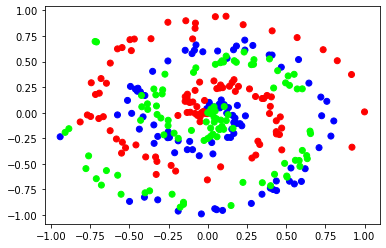

(300, 2)


In [11]:
import matplotlib.pyplot as plt
def spiral_data(points, classes):
    Xsp = np.zeros((points*classes, 2))
    ysp = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        Xsp[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        ysp[ix] = class_number
    return Xsp, ysp
Xsp, ysp = spiral_data(100,3)
Xsp = np.array(Xsp)
plt.scatter(Xsp[:,0], Xsp[:,1], c = ysp, cmap = 'brg')
plt.show()

print(np.shape(Xsp))


Softmax = smaxout * kronecker delta - smaxout*smaxout.T

In [12]:
class layer():
    def __init__(self, inputs, neurons):
        self.weights = 0.01 * np.random.randn(inputs,neurons)
        self.biases = np.zeros((1,neurons))
    #FORWARD PASS:
    def forward(self,inputs):
        self.inputs = inputs
        self.output = np.dot(inputs,self.weights)+self.biases
    def backward(self,dvalues):
        self.dweights = np.dot(self.inputs.T,dvalues)
        self.dbiases = np.sum(dvalues,axis=0,keepdims=True)
        self.dinputs = np.dot(dvalues,self.weights.T)
        
class relu():
    def forward(self,inputs):
        self.inputs = inputs
        self.output = np.maximum(0,inputs)
    def backward(self,dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0
        
class softmax():
    def forward(self, inputs):
        self.inputs = inputs
        ex_batch = np.exp(inputs -  np.max(inputs , axis = 1 , keepdims = True))
        prob= ex_batch/np.sum(ex_batch , axis=1, keepdims = True)
        self.output = prob
        
    def backward(self,dvalues):
            self.dinputs = np.empty_like(dvalues)
            for i ,(single_output, single_dvalues) in enumerate(zip(self.output,dvalues)):
                single_output = single_output.reshape(-1,1)
                jacobian_matrix = np.diagflat(single_output)-np.dot(single_output, 
                                                                    single_output.T)
                self.dinputs[i] = np.dot(jacobian_matrix, single_dvalues)
            
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output , y)
        #calculate mean loss
        data_loss = np.mean(sample_losses)
        return data_loss
    
class CategoricalCrossEntropy_Loss(Loss):
    
    def forward(self , y_pred , y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred , 1e-8 , 1-1e-8)
               
        if len(y_true.shape) ==  1:
            confi = y_pred_clipped[range(samples),y_true]
        if len(y_true.shape) == 2:
            confi =  np.sum(y_pred_clipped * y_true,axis = 1)
        
        loss = -np.log(confi)
        return loss
    def backward(self,dvalues,y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        #print(y_true)
        self.dinputs = -y_true/dvalues
        self.dinputs = self.dinputs/samples


loss = y_pred - y_true

In [13]:
layer1 = layer(2,3)
activation1 = relu()
layer2 = layer(3,3)
smax = softmax()
logd = CategoricalCrossEntropy_Loss()

layer1.forward(Xsp)
activation1.forward(layer1.output)

layer2.forward(activation1.output)
smax.forward(layer2.output)
loss = logd.forward(smax.output , ysp)
print(loss[:5])
#print(loss)

predictions = np.argmax(smax.output, axis = 1)
if len(ysp.shape)==2:
    ysp = np.argmax(ysp,axis=1)
accuaracy = np.mean(predictions==ysp)
print('acc:',accuaracy)

#backward pass:

logd.backward(smax.output,ysp)
smax.backward(logd.dinputs)
#loss_activation.backward(loss_activation.output,ysp)
layer2.backward(smax.dinputs)
activation1.backward(layer2.dinputs)
layer1.backward(activation1.dinputs)

print(layer1.dweights)
print(layer1.dbiases)





[1.09861229 1.09861278 1.09861315 1.0986137  1.09861393]
acc: 0.3566666666666667
[[-2.74211072e-06 -7.11173718e-05  3.86065920e-05]
 [-3.47991327e-06 -2.62296680e-04 -2.36058528e-04]]
[[ 5.03292070e-07 -7.49759689e-04 -4.48316750e-04]]


In [14]:
print(smax.dinputs[299])

[ 0.00111109  0.00111116 -0.00222226]


In [15]:
print(layer2.dweights)
print(layer2.dbiases)

[[ 2.23011405e-04 -3.77581326e-04  1.54569921e-04]
 [ 1.16399487e-05 -3.54347887e-05  2.37948401e-05]
 [ 6.73383725e-05 -1.76379589e-04  1.09041216e-04]]
[[-2.34970263e-06  6.72222535e-06 -4.37252273e-06]]
